In [39]:
!pip install fbprophet

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import mean_squared_error

from fbprophet import Prophet

sns.set()

In [41]:
file_path = "data.csv"

In [42]:
data_backup = pd.read_csv(file_path)
data_backup.Date = pd.to_datetime(data_backup.Date)
data_backup.set_index("Date", inplace = True)

In [43]:
data = data_backup[["spx", "spx_ret"]]

In [44]:
train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]

In [45]:
returns_df = pd.DataFrame(columns = ["ds", "y"])
returns_df["ds"] = data.index
returns_df["y"] = data["spx_ret"].values

In [46]:
returns_train_df = pd.DataFrame(columns = ["ds", "y"])
returns_train_df["ds"] = train_df.index
returns_train_df["y"] = train_df["spx_ret"].values

In [47]:
returns_test_df = pd.DataFrame(columns = ["ds", "y"])
returns_test_df["ds"] = test_df.index
returns_test_df["y"] = test_df["spx_ret"].values

In [48]:
returns_model = Prophet()
returns_model.fit(returns_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Making Predictions

In [49]:
future_df = returns_model.make_future_dataframe(periods=len(returns_test_df.index), freq = "B")

In [50]:
returns_predictions_df = returns_model.predict(future_df)

In [51]:
returns_predictions_df.head()

ds     trend  ...  multiplicative_terms_upper      yhat
0 1994-01-06  0.165755  ...                         0.0  0.094359
1 1994-01-07  0.165732  ...                         0.0  0.076139
2 1994-01-10  0.165664  ...                         0.0  0.041239
3 1994-01-11  0.165641  ...                         0.0  0.082703
4 1994-01-12  0.165619  ...                         0.0  0.040879

[5 rows x 19 columns]

### Plotting Forecasts and components

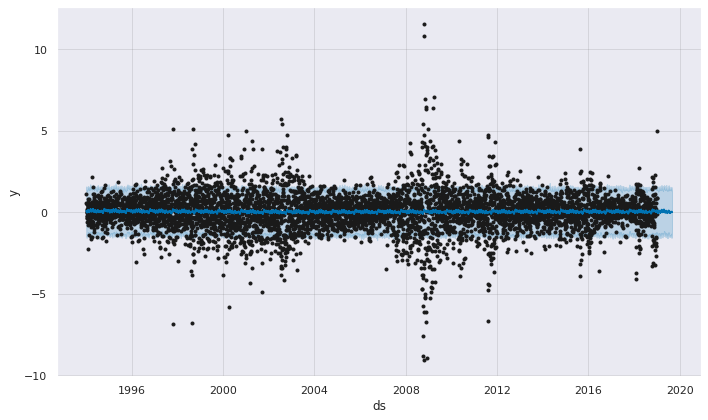

In [52]:
returns_model.plot(returns_predictions_df)
plt.show()

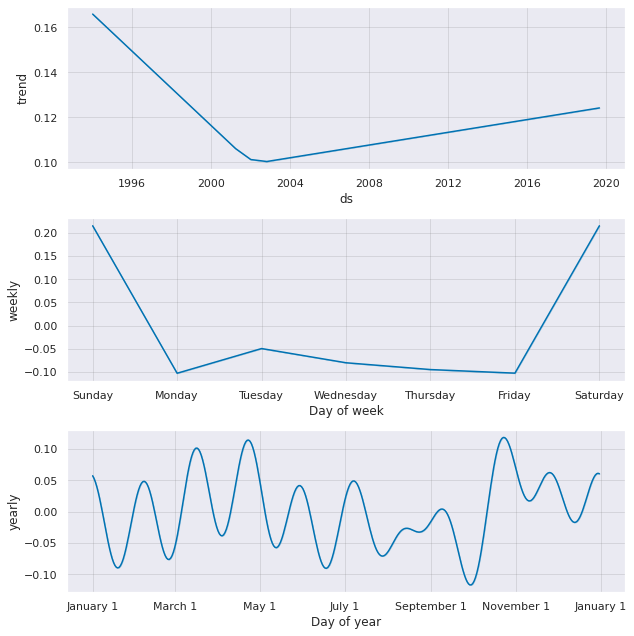

In [53]:
returns_model.plot_components(returns_predictions_df)
plt.show()

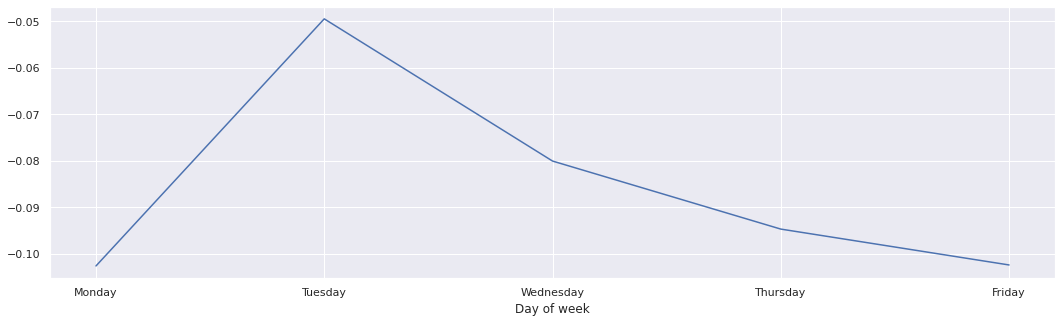

In [54]:
start_weekday = 0
while(True):
  if returns_predictions_df.ds[start_weekday].weekday() == 0:
    break
  else:
    start_weekday = start_weekday + 1

end_weekday = start_weekday + 5

days = returns_predictions_df.ds[start_weekday:end_weekday]
weekly_seas = returns_predictions_df.weekly[start_weekday:end_weekday]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(5), weekly_seas)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(days.dt.day_name())
ax.set_xlabel('Day of week')

plt.show()

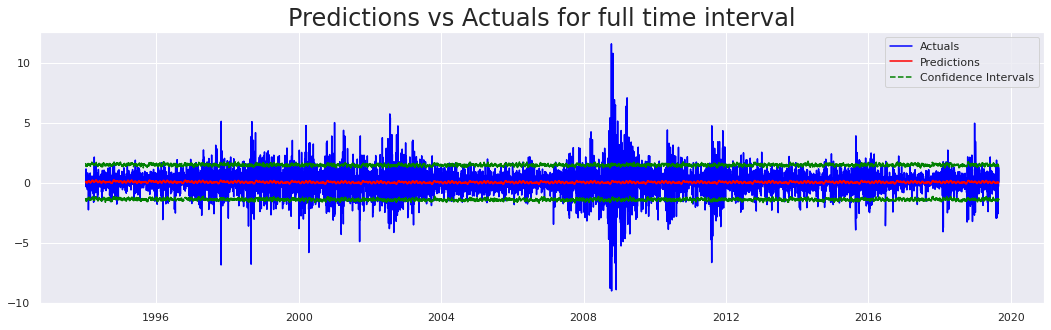

In [55]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(data["spx_ret"], color = "blue", label = "Actuals")
plt.plot(data.index, returns_predictions_df["yhat"], color = "red", label = "Predictions")
plt.plot(data.index, returns_predictions_df["yhat_lower"], color = "green", linestyle = "--", label = "Confidence Intervals")
plt.plot(data.index, returns_predictions_df["yhat_upper"], color = "green", linestyle = "--")

plt.title("Predictions vs Actuals for full time interval", size = 24)

plt.legend()
plt.show()

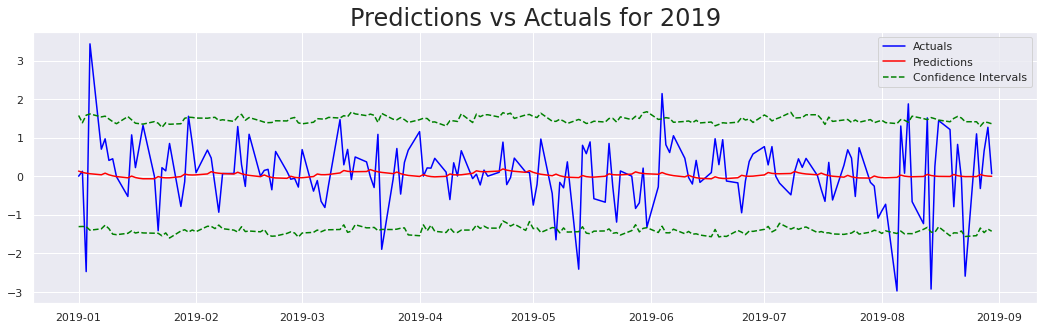

In [56]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(test_df["spx_ret"], color = "blue", label = "Actuals")
plt.plot(test_df.index, returns_predictions_df.loc[returns_train_df.index[-1]+1:]["yhat"], color = "red", label = "Predictions")
plt.plot(test_df.index, returns_predictions_df.loc[returns_train_df.index[-1]+1:]["yhat_lower"], color = "green", linestyle = "--", label = "Confidence Intervals")
plt.plot(test_df.index, returns_predictions_df.loc[returns_train_df.index[-1]+1:]["yhat_upper"], color = "green", linestyle = "--")

plt.title("Predictions vs Actuals for 2019", size = 24)

plt.legend()
plt.show()

In [57]:
y_true = returns_test_df["y"].values

y_pred = returns_predictions_df["yhat"][-len(returns_test_df.index):].values

np.sqrt(mean_squared_error(y_true, y_pred))

0.8555543688702273

## Prices

In [58]:
prices_df = pd.DataFrame(columns = ["ds", "y"])
prices_df["ds"] = data.index
prices_df["y"] = data["spx"].values

In [59]:
prices_train_df = pd.DataFrame(columns = ["ds", "y"])
prices_train_df["ds"] = train_df.index
prices_train_df["y"] = train_df["spx"].values

In [60]:
prices_test_df = pd.DataFrame(columns = ["ds", "y"])
prices_test_df["ds"] = test_df.index
prices_test_df["y"] = test_df["spx"].values

In [61]:
prices_model = Prophet()
prices_model.fit(prices_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
future_df = prices_model.make_future_dataframe(periods=len(prices_test_df.index), freq = "B")

In [63]:
prices_predictions_df = prices_model.predict(future_df)

In [64]:
prices_predictions_df.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 1994-01-06  442.372553  ...                         0.0  446.081952
1 1994-01-07  442.466441  ...                         0.0  446.726607
2 1994-01-10  442.748103  ...                         0.0  447.824279
3 1994-01-11  442.841991  ...                         0.0  448.744686
4 1994-01-12  442.935878  ...                         0.0  449.179327

[5 rows x 19 columns]

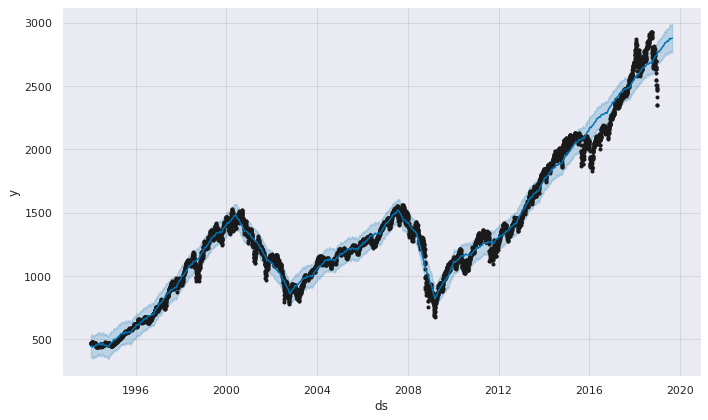

In [65]:
prices_model.plot(prices_predictions_df)
plt.show()

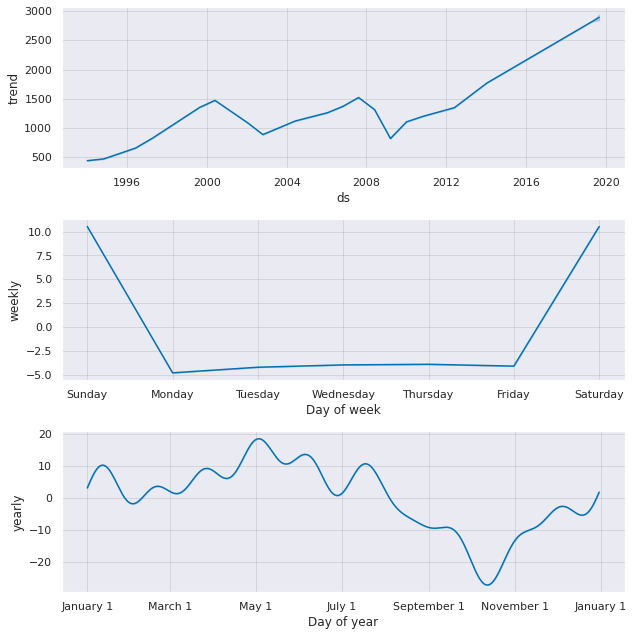

In [66]:
prices_model.plot_components(prices_predictions_df)
plt.show()

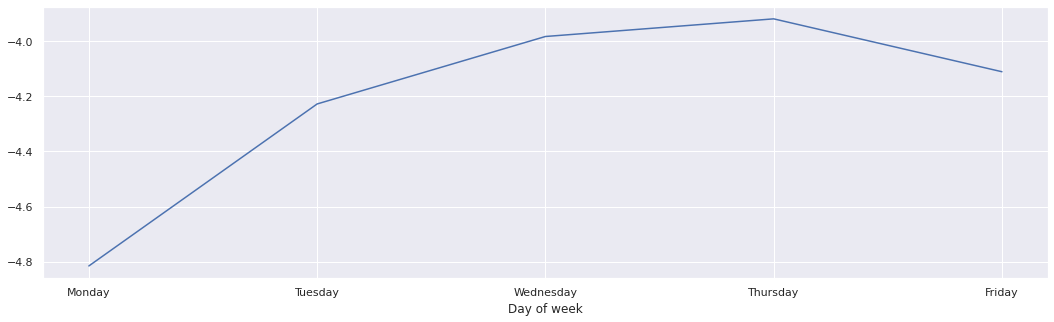

In [67]:
start_weekday = 0
while(True):
  if prices_predictions_df.ds[start_weekday].weekday() == 0:
    break
  else:
    start_weekday = start_weekday + 1

end_weekday = start_weekday + 5

days = prices_predictions_df.ds[start_weekday:end_weekday]
weekly_seas = prices_predictions_df.weekly[start_weekday:end_weekday]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(5), weekly_seas)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(days.dt.day_name())
ax.set_xlabel('Day of week')

plt.show()

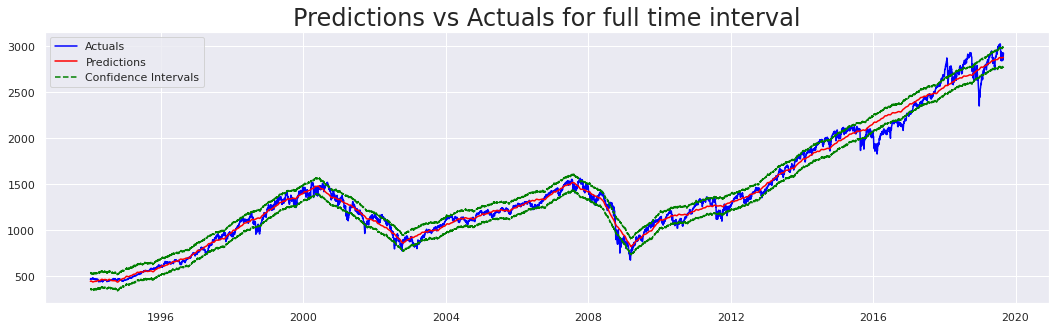

In [68]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(data["spx"], color = "blue", label = "Actuals")
plt.plot(data.index, prices_predictions_df["yhat"], color = "red", label = "Predictions")
plt.plot(data.index, prices_predictions_df["yhat_lower"], color = "green", linestyle = "--", label = "Confidence Intervals")
plt.plot(data.index, prices_predictions_df["yhat_upper"], color = "green", linestyle = "--")

plt.title("Predictions vs Actuals for full time interval", size = 24)

plt.legend()
plt.show()

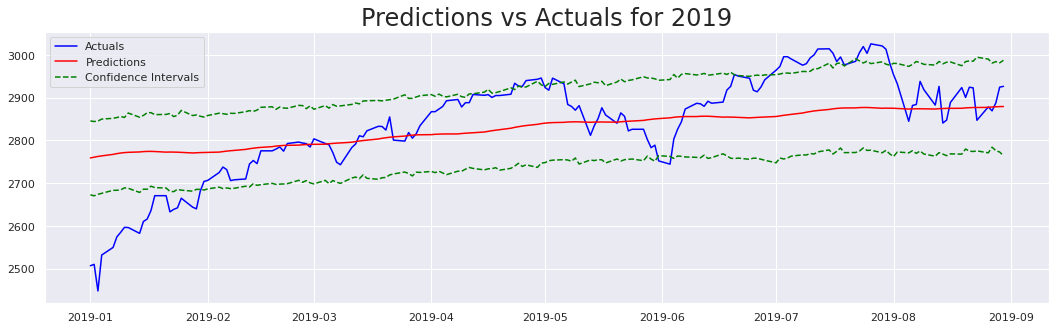

In [69]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(test_df["spx"], color = "blue", label = "Actuals")
plt.plot(test_df.index, prices_predictions_df.loc[prices_train_df.index[-1]+1:]["yhat"], color = "red", label = "Predictions")
plt.plot(test_df.index, prices_predictions_df.loc[prices_train_df.index[-1]+1:]["yhat_lower"], color = "green", linestyle = "--", label = "Confidence Intervals")
plt.plot(test_df.index, prices_predictions_df.loc[prices_train_df.index[-1]+1:]["yhat_upper"], color = "green", linestyle = "--")

plt.title("Predictions vs Actuals for 2019", size = 24)

plt.legend()
plt.show()

### Accuracy

In [70]:
y_true = prices_test_df["y"].values

y_pred = prices_predictions_df["yhat"][-len(prices_test_df.index):].values

np.sqrt(mean_squared_error(y_true, y_pred))

90.76856874743561